In [2]:
from statsmodels.formula.api import ols # for R-like formulas
import pandas as pd # use pandas dataframes with formulas
import statsmodels.api as sm
import matplotlib.pyplot as plt


In [3]:
#Importando la data

df= pd.read_excel("./Fallecimientos_tipo_transposed.xlsx")

In [4]:
df.describe()

,2016,2017,2018,2019,2020,2021,FALLECIMIENTOS_TOTALES
count,9.000000,9.000000,9.000000,9.000000,9.00000,9.000000,9.000000
mean,571.555556,610.555556,406.222222,627.333333,523.00000,579.888889,3318.555556
std,276.387912,252.609437,271.633843,278.940854,196.54516,384.831601,884.889274
min,100.000000,229.000000,90.000000,166.000000,148.00000,28.000000,2027.000000
25%,507.000000,337.000000,245.000000,477.000000,392.00000,190.000000,2703.000000
50%,563.000000,664.000000,346.000000,730.000000,548.00000,817.000000,3148.000000
75%,766.000000,774.000000,523.000000,810.000000,636.00000,936.000000,4094.000000
max,938.000000,904.000000,933.000000,953.000000,808.00000,946.000000,4409.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   TIPO                    9 non-null      object
 1   2016                    9 non-null      int64 
 2   2017                    9 non-null      int64 
 3   2018                    9 non-null      int64 
 4   2019                    9 non-null      int64 
 5   2020                    9 non-null      int64 
 6   2021                    9 non-null      int64 
 7   FALLECIMIENTOS_TOTALES  9 non-null      int64 
dtypes: int64(7), object(1)
memory usage: 704.0+ bytes


In [6]:
df['TIPO'].unique()

array(['Aplastamiento', 'Atropello', 'Caí\xadda', 'Colisiones',
       'Colisiones con Animales', 'Deslizamiento', 'Estrellamiento',
       'Volcadura', 'Sin Especificación'], dtype=object)

In [11]:
df['TIPO'].replace(['Aplastamiento', 'Atropello', 'Caí\xadda', 'Colisiones',
       'Colisiones con Animales', 'Deslizamiento', 'Estrellamiento',
       'Volcadura', 'Sin Especificación'],[0,1,2,3,4,5,6,7,8],inplace=True)

In [12]:
df['TIPO'].unique()

array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int64)

In [13]:
#Buscando valores nulos
df.isnull().sum()

TIPO                      0
2016                      0
2017                      0
2018                      0
2019                      0
2020                      0
2021                      0
FALLECIMIENTOS_TOTALES    0
dtype: int64

In [14]:
df

,TIPO,2016,2017,2018,2019,2020,2021,FALLECIMIENTOS_TOTALES
0,0,563,664,308,932,691,936,4094
1,1,100,880,523,730,492,28,2753
2,2,938,727,933,477,392,942,4409
3,3,518,337,434,166,382,190,2027
4,4,766,229,107,810,148,401,2461
5,4,223,662,346,782,548,142,2703
6,5,847,318,90,311,636,946,3148
7,6,682,774,245,953,610,817,4081
8,7,507,904,670,485,808,817,4191


In [15]:
# Primer modelo usando dos variables

#formula.api.ols hace intercepto automaticamente
#modelo1
estimator = ols(formula='FALLECIMIENTOS_TOTALES ~ TIPO', data=df)
trained_estimator = estimator.fit()

In [16]:
#coeficientes
trained_estimator.params

Intercept    3177.315789
TIPO           39.723684
dtype: float64

In [17]:
#summary
print(trained_estimator.summary())

                              OLS Regression Results                              
Dep. Variable:     FALLECIMIENTOS_TOTALES   R-squared:                       0.011
Model:                                OLS   Adj. R-squared:                 -0.131
Method:                     Least Squares   F-statistic:                   0.07525
Date:                    Thu, 25 Nov 2021   Prob (F-statistic):              0.792
Time:                            12:42:05   Log-Likelihood:                -73.261
No. Observations:                       9   AIC:                             150.5
Df Residuals:                           7   BIC:                             150.9
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   

D:\Anaconda\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [18]:
# Segundo modelo usando dos variables/ Eliminando las variables que no fueron signifcativas Country y Purchased.

#formula.api.ols hace intercepto automaticamente
#modelo1
estimator = ols(formula='FALLECIMIENTOS_TOTALES ~  TIPO ', data=df)
trained_estimator = estimator.fit()

In [19]:
#coeficientes
trained_estimator.params

Intercept    3177.315789
TIPO           39.723684
dtype: float64

In [20]:
#summary
print(trained_estimator.summary())

                              OLS Regression Results                              
Dep. Variable:     FALLECIMIENTOS_TOTALES   R-squared:                       0.011
Model:                                OLS   Adj. R-squared:                 -0.131
Method:                     Least Squares   F-statistic:                   0.07525
Date:                    Thu, 25 Nov 2021   Prob (F-statistic):              0.792
Time:                            12:42:10   Log-Likelihood:                -73.261
No. Observations:                       9   AIC:                             150.5
Df Residuals:                           7   BIC:                             150.9
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   

D:\Anaconda\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [35]:
# Gráficando la correlación

In [21]:
import matplotlib.pyplot as plt

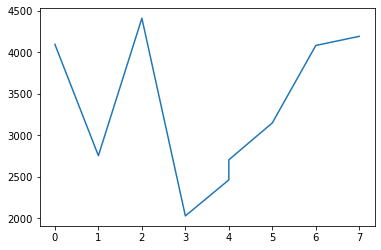

In [22]:
plt.plot(df['TIPO'],df['FALLECIMIENTOS_TOTALES'])

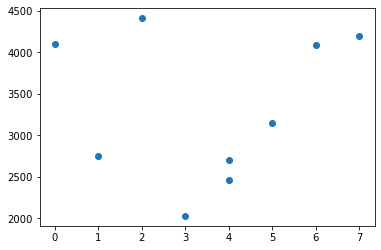

In [23]:
plt.scatter(df['TIPO'],df['FALLECIMIENTOS_TOTALES'])